In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns


In [45]:
dia = pd.read_csv("C:\\Users\\MirMobin\\Desktop\\DT\\diabetes.csv")

In [46]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
dia.shape

(768, 9)

In [48]:
print(type(dia))

<class 'pandas.core.frame.DataFrame'>


In [49]:
dia.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [50]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
#dia.groupby(['Outcome','Age']).mean()

In [53]:
dia['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

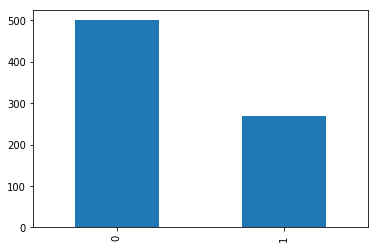

In [54]:
dia['Outcome'].value_counts().plot('bar');

In [55]:
dia.groupby('Outcome').mean()[['Age']]

,Age
Outcome,
0,31.190000
1,37.067164


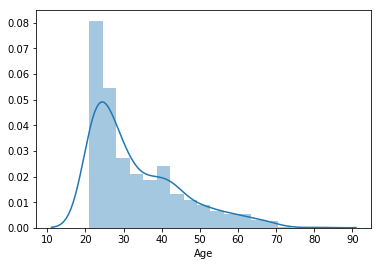

In [56]:
sns.distplot(dia['Age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168FEAF3940>,
      dtype=object)

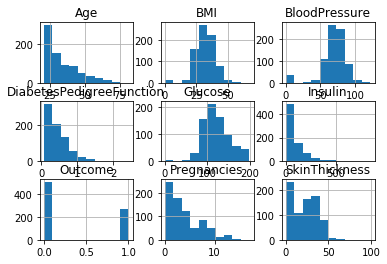

In [57]:
dia.hist()

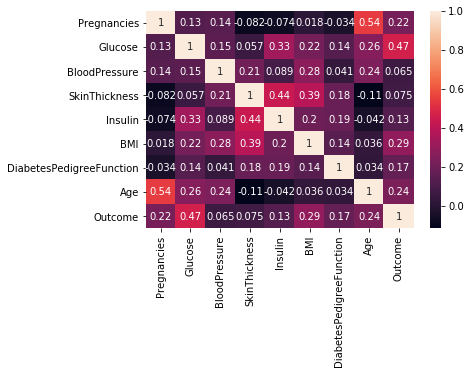

In [58]:
sns.heatmap(dia.corr(), annot=True)

In [59]:
#x = dia [['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
#y = dia ['Outcome']

In [60]:
x = dia.iloc[ : , [0, 1, 2, 3, 4, 5, 6, 7]]
y = dia.iloc[ : , 8]

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2 )
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


# DecisionTree

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [64]:
dia = DecisionTreeRegressor()
dia.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [65]:
y_pred = dia.predict(x_test)

In [66]:
print('The accuracy of DecisionTreeRegressor is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of DecisionTreeRegressor is:  0.7012987012987013


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       155
           1       0.55      0.51      0.53        76

   micro avg       0.70      0.70      0.70       231
   macro avg       0.66      0.65      0.66       231
weighted avg       0.70      0.70      0.70       231



# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)

In [69]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [70]:
y_pred2 = knn.predict(x_test)

In [71]:
print('The accuracy of KNeighborsClassifier is: ', metrics.accuracy_score(y_pred2, y_test))

The accuracy of KNeighborsClassifier is:  0.7705627705627706


# svm

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [73]:
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [74]:
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7532467532467533


# gamma='scale'

In [75]:
clf1 = SVC(gamma='scale')
clf1.fit(x_train,y_train)
#

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
y_pred1 = clf1.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7532467532467533


# RandomForestClassifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 10,warm_start=True)

In [79]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=True)

In [80]:
y_pred3 = rf.predict(x_test)

In [81]:
print('The accuracy of RandomForestClassifier is: ', metrics.accuracy_score(y_pred2, y_test))

The accuracy of RandomForestClassifier is:  0.7705627705627706


In [82]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# XGBClassifier

In [83]:
from sklearn import datasets
from xgboost import XGBClassifier

In [84]:
bst = XGBClassifier(n_estimators=500)
bst.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [85]:
y_pred4 = bst.predict(x_test)

In [86]:
print('The accuracy of XGBClassifier is: ', metrics.accuracy_score(y_pred4, y_test))

The accuracy of XGBClassifier is:  0.7575757575757576
